In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
import seaborn as sns
import scipy as sp
import statsmodels.api as sm
from patsy import dmatrix
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
train_16 = pd.read_csv('train_2016_v2.csv',parse_dates=['transactiondate'],dtype={'parcelid':int})

In [3]:
prop_16 = pd.read_csv('properties_2016.csv',dtype={'fireplaceflag':object, 'taxdelinquencyflag':object, 'fireplaceflag':object, 'propertyzoningdesc':object, 'propertycountylandusecode':object, 'hashottuborspa':object})

In [4]:
train_df = pd.merge(train_16,prop_16,on='parcelid', how ='left')

In [5]:
full_prop_16 = pd.read_csv('full_prop_16.csv')

/home/hskimim/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
missing_df = train_df.isnull().sum().reset_index()
missing_df.columns = ['col','missing_cnt']
missing_df['missing_ratio'] = missing_df.missing_cnt / len(train_df)
missing_df.sort_values(by='missing_ratio',inplace=True)
missing_df.reset_index(inplace=True)

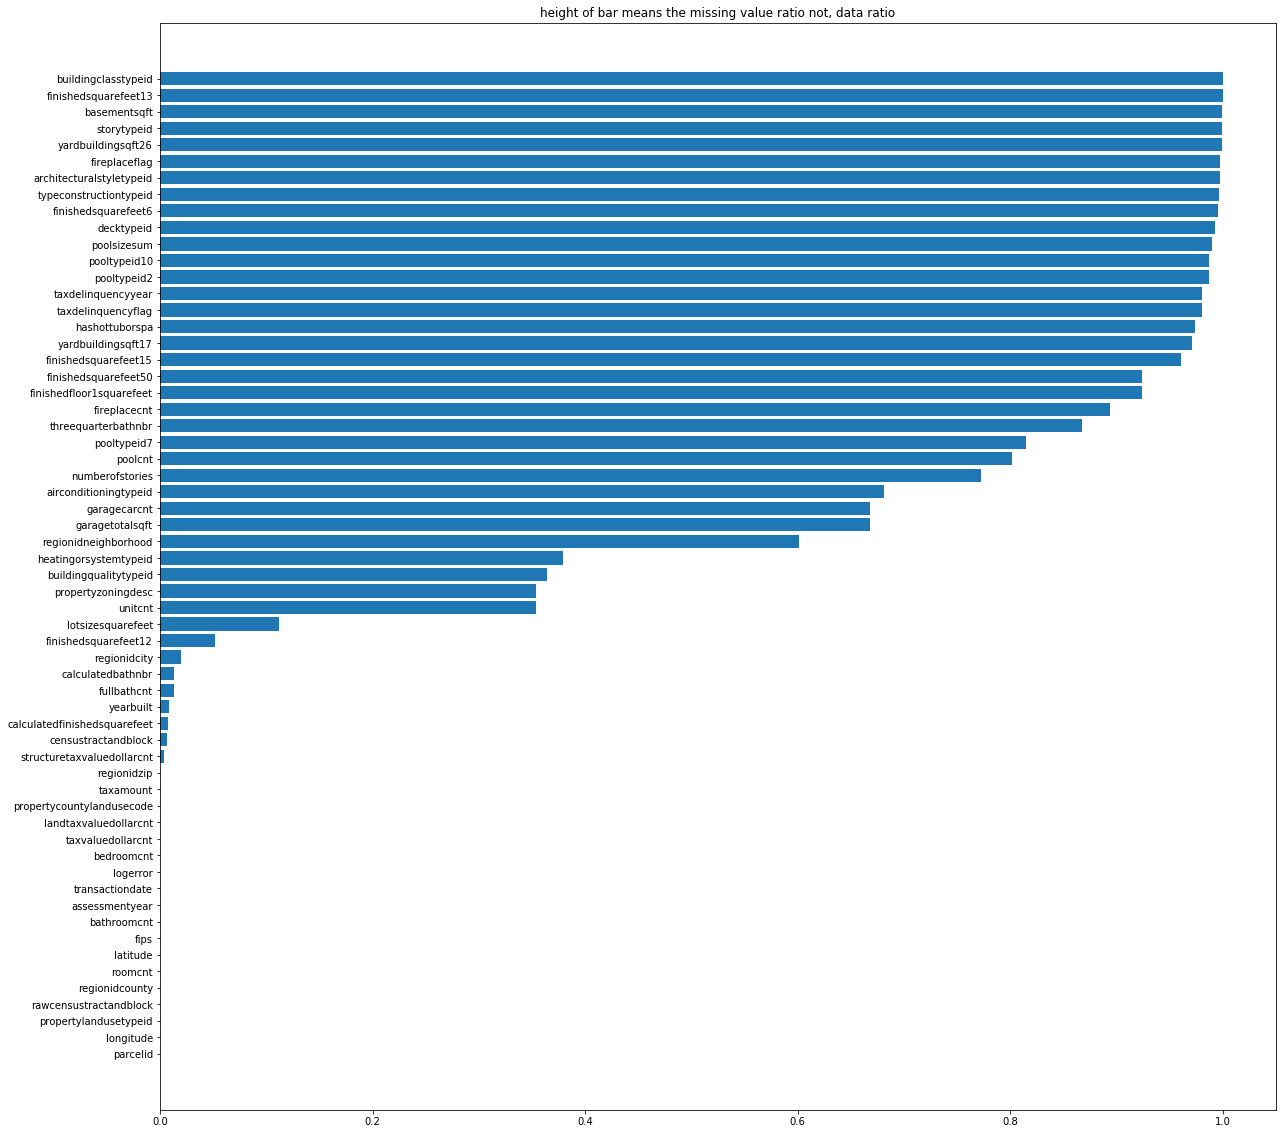

In [7]:
plt.figure(figsize=(20,20))
missing_df.tail()
plt.barh(missing_df.col,missing_df.missing_ratio)
plt.title('height of bar means the missing value ratio not, data ratio')
plt.show()

# filling the data

In [8]:
train_df.calculatedbathnbr = train_df.calculatedbathnbr.fillna(train_df.calculatedbathnbr.mode()[0])

In [9]:
train_df.fullbathcnt = train_df.fullbathcnt.fillna(train_df.fullbathcnt.mode()[0])

In [10]:
train_df.heatingorsystemtypeid = train_df.heatingorsystemtypeid.fillna(train_df.heatingorsystemtypeid.mode()[0])

In [11]:
train_df.heatingorsystemtypeid = train_df.heatingorsystemtypeid.astype('object')

In [12]:
train_df.garagecarcnt = train_df.garagecarcnt.fillna(train_df.garagecarcnt.mode()[0])

In [13]:
train_df.garagetotalsqft = train_df.garagetotalsqft.fillna(np.mean(train_df.garagetotalsqft))

In [14]:
train_df.airconditioningtypeid = train_df.airconditioningtypeid.fillna(train_df.airconditioningtypeid.mode()[0])

In [15]:
train_df.airconditioningtypeid = train_df.airconditioningtypeid.astype('object')

In [16]:
train_df.poolcnt = train_df.poolcnt.fillna(0)

In [17]:
train_df.poolcnt = train_df.poolcnt.astype('object')

In [18]:
train_df.pooltypeid7 = train_df.pooltypeid7.fillna(0)

In [19]:
train_df.pooltypeid7 = train_df.pooltypeid7.astype('object')

In [20]:
train_df.threequarterbathnbr = train_df.threequarterbathnbr.fillna(0)

In [21]:
train_df.hashottuborspa  = train_df.hashottuborspa .fillna('False')

In [22]:
train_df.bathroomcnt = train_df.bathroomcnt.fillna(train_df.bathroomcnt.mode()[0])

In [23]:
train_df.bedroomcnt = train_df.bedroomcnt.fillna(train_df.bedroomcnt.mode()[0])

In [24]:
train_df.fireplacecnt  = train_df.fireplacecnt .fillna(0)

In [25]:
train_df.fireplacecnt = train_df.fireplacecnt.astype('object')

In [26]:
train_df.pooltypeid2  = train_df.pooltypeid2 .fillna(0)

In [27]:
train_df.pooltypeid2 = train_df.pooltypeid2.astype('object')

In [28]:
train_df.pooltypeid10  = train_df.pooltypeid10 .fillna(0)

In [29]:
train_df.pooltypeid10 = train_df.pooltypeid10.astype('object')

In [30]:
train_df.poolsizesum  = train_df.poolsizesum .fillna(0)

In [31]:
train_df.fireplaceflag  = train_df.fireplaceflag .fillna('False')

In [32]:
train_df.yearbuilt = train_df.yearbuilt.fillna(train_df.yearbuilt.mode()[0])

In [33]:
train_df.unitcnt = train_df.unitcnt.fillna(train_df.unitcnt.mode()[0])

In [34]:
train_df.buildingqualitytypeid = train_df.buildingqualitytypeid.fillna(train_df.buildingqualitytypeid.mean())

In [35]:
train_df.buildingqualitytypeid = train_df.buildingqualitytypeid.astype('object')

In [36]:
train_df.numberofstories = train_df.numberofstories.fillna(train_df.numberofstories.mode()[0])

In [37]:
train_df.typeconstructiontypeid = train_df.typeconstructiontypeid.fillna('None')

In [38]:
train_df.typeconstructiontypeid = train_df.typeconstructiontypeid.astype('object')

In [39]:
train_df.architecturalstyletypeid = train_df.architecturalstyletypeid.fillna('None')

In [40]:
train_df.architecturalstyletypeid = train_df.architecturalstyletypeid.astype('object')

In [41]:
train_df.storytypeid = train_df.storytypeid.fillna('None')

In [42]:
train_df.storytypeid = train_df.storytypeid.astype('object')

In [43]:
train_df.buildingclasstypeid = train_df.buildingclasstypeid.fillna('None')

In [44]:
train_df.buildingclasstypeid = train_df.buildingclasstypeid.astype('object')

In [45]:
train_df.decktypeid = train_df.decktypeid.fillna('None')

In [46]:
train_df.decktypeid = train_df.decktypeid.astype('object')

In [47]:
train_df.propertycountylandusecode = train_df.propertycountylandusecode.fillna(train_df.propertycountylandusecode.mode()[0])

In [48]:
train_df.propertycountylandusecode = train_df.propertycountylandusecode.astype('object') 

In [49]:
train_df.propertylandusetypeid = train_df.propertylandusetypeid.astype('object') 

In [50]:
train_df.drop(columns='censustractandblock',inplace=True)

In [51]:
train_df.rawcensustractandblock = [str(raw)[:5] for raw in train_df.rawcensustractandblock]

In [52]:
train_df.fips = train_df.fips.astype('object') 

In [53]:
train_df.propertycountylandusecode = train_df.propertycountylandusecode.astype('object') 

In [54]:
train_df.regionidzip = train_df.regionidzip.fillna(train_df.regionidzip.mode()[0])

In [55]:
train_df.regionidzip = train_df.regionidzip.astype('object') 

In [56]:
train_df.regionidcity = train_df.regionidcity.fillna(train_df.regionidcity.mode()[0])

In [57]:
train_df.regionidcity = train_df.regionidcity.astype('object') 

In [58]:
train_df.regionidcounty = train_df.regionidcounty.astype('object') 

In [59]:
train_df.propertyzoningdesc = train_df.propertyzoningdesc.fillna('None')

In [60]:
train_df.propertyzoningdesc = train_df.propertyzoningdesc.astype('object') 

In [61]:
train_df.regionidneighborhood = train_df.regionidneighborhood.fillna((np.mean(train_df.regionidneighborhood)))

In [62]:
train_df.calculatedfinishedsquarefeet = train_df.calculatedfinishedsquarefeet.fillna(train_df.calculatedfinishedsquarefeet.mode()[0])

In [63]:
train_df.finishedsquarefeet12 = train_df.finishedsquarefeet12.fillna(train_df.finishedsquarefeet12.mode()[0])

In [64]:
train_df.lotsizesquarefeet = train_df.lotsizesquarefeet.fillna(train_df.lotsizesquarefeet.mode()[0])

In [65]:
train_df.finishedfloor1squarefeet = train_df.finishedfloor1squarefeet.fillna(0)

In [66]:
train_df.finishedsquarefeet50 = train_df.finishedsquarefeet50.fillna(0)

In [67]:
train_df.finishedsquarefeet15 = train_df.finishedsquarefeet15.fillna(0)

In [68]:
train_df.finishedsquarefeet6 = train_df.finishedsquarefeet6.fillna(0)

In [69]:
train_df.basementsqft = train_df.basementsqft.fillna(0)

In [70]:
train_df.finishedsquarefeet13 = train_df.finishedsquarefeet13.fillna(0)

In [71]:
train_df.drop(columns='assessmentyear',inplace=True)

In [72]:
train_df.taxvaluedollarcnt  = train_df.taxvaluedollarcnt .fillna(np.mean(train_df.taxvaluedollarcnt))

In [73]:
train_df.landtaxvaluedollarcnt  = train_df.landtaxvaluedollarcnt .fillna(np.mean(train_df.landtaxvaluedollarcnt))

In [74]:
train_df.taxamount = train_df.taxamount.fillna(np.mean(train_df.taxamount))

In [75]:
train_df.structuretaxvaluedollarcnt = train_df.structuretaxvaluedollarcnt.fillna(np.mean(train_df.structuretaxvaluedollarcnt))

In [76]:
train_df.taxdelinquencyflag = train_df.taxdelinquencyflag.fillna('F')

In [77]:
train_df.taxdelinquencyyear = train_df.taxdelinquencyyear.fillna('None')

In [78]:
train_df.yardbuildingsqft17 = train_df.yardbuildingsqft17.fillna(0)

In [79]:
train_df.yardbuildingsqft26 = train_df.yardbuildingsqft26.fillna(0)

In [80]:
numerical_features = [col for col in train_df.columns if train_df[col].dtypes != 'object']
categorical_features = [col for col in train_df.columns if train_df[col].dtypes == 'object']
len(numerical_features),len(categorical_features)

(33, 25)

In [81]:
numerical_features.remove('transactiondate')
numerical_features.remove('logerror')
numerical_features.remove('parcelid')

In [82]:
correl_val = []
for col in numerical_features:
    correl_val.append(np.corrcoef(train_df['logerror'],train_df[col])[0][1])
len(correl_val)
correl_val = sorted(correl_val)

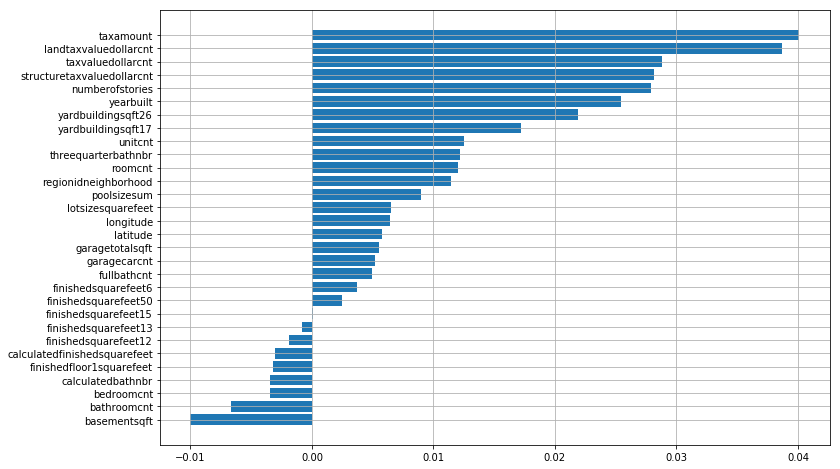

In [83]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.barh(numerical_features,correl_val)
plt.show()

상관관계가 뚜렷한 컬럼이 없다.

In [84]:
outer_feature_col = [
'architecturalstyletypeid',
'buildingqualitytypeid',
'buildingclasstypeid',
'decktypeid',
'numberofstories',
'storytypeid',
'typeconstructiontypeid',
'unitcnt',
'yearbuilt']


In [85]:
sqrt_feature_col =[
    'basementsqft',
'finishedfloor1squarefeet',
'calculatedfinishedsquarefeet',
'finishedsquarefeet6',
'finishedsquarefeet12',
'finishedsquarefeet13',
'finishedsquarefeet15',
'finishedsquarefeet50',
'lotsizesquarefeet',
'yardbuildingsqft17',
'yardbuildingsqft26'
]

In [86]:
tax_feature_col = [
    'taxvaluedollarcnt',
    'structuretaxvaluedollarcnt',
    'landtaxvaluedollarcnt',
    'taxamount',
    'taxdelinquencyflag',
    'taxdelinquencyyear'
]

In [87]:
region_feature_col = [
    'propertycountylandusecode',
    'propertylandusetypeid',
    'propertyzoningdesc',
    'rawcensustractandblock',
    'latitude',
    'longitude',
    'fips',
    'regionidcounty',
    'regionidcity',
    'regionidzip',
    'regionidneighborhood'
]

In [88]:
inner_feature_col=[
'airconditioningtypeid',
'bathroomcnt',
'calculatedbathnbr',
'threequarterbathnbr',
'fullbathcnt',
'bedroomcnt',
'roomcnt',
'garagecarcnt',
'garagetotalsqft',
'airconditioningtypeid',
'fireplacecnt',
'fireplaceflag',
'hashottuborspa',
'heatingorsystemtypeid',
'poolcnt',
'poolsizesum',
'pooltypeid10',
'pooltypeid2',
'pooltypeid7'
]

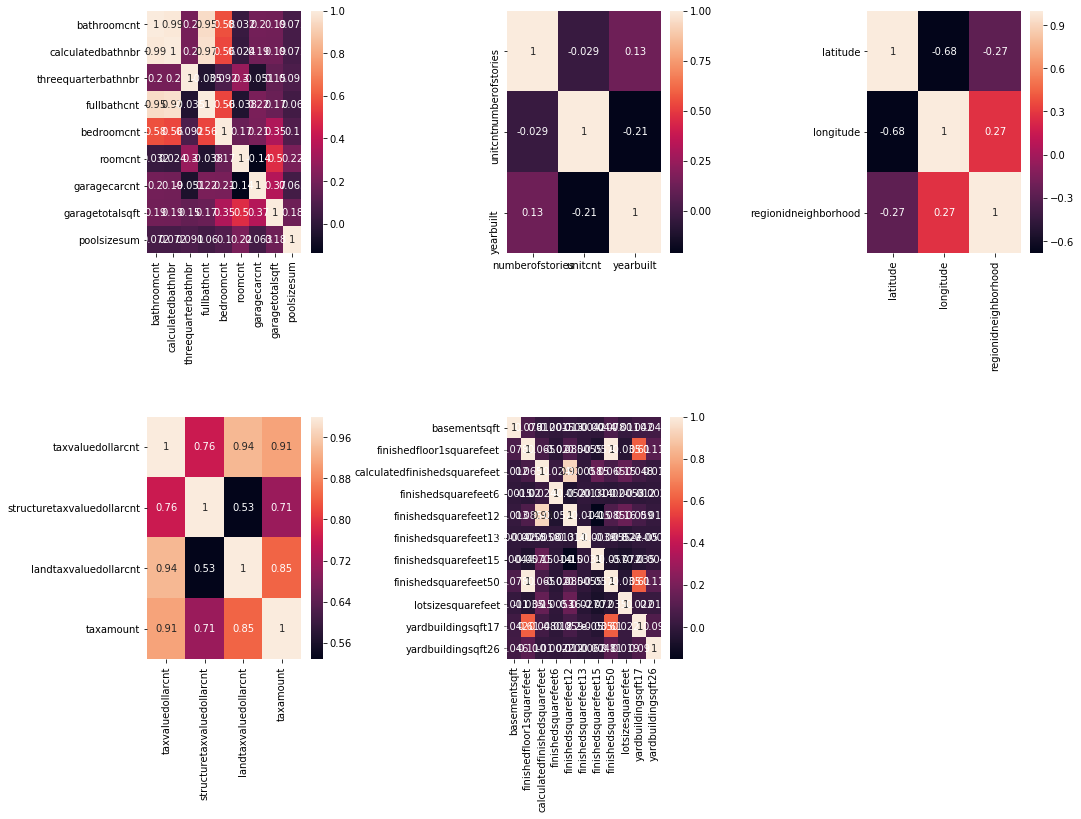

In [89]:
columns = [inner_feature_col,outer_feature_col,region_feature_col,tax_feature_col,sqrt_feature_col]
plt.figure(figsize=(15,15))
for idx,col in enumerate(columns):
    plt.subplot(3,3,idx+1)
    corrmat = train_df[col].corr(method = 'spearman')
    sns.heatmap(corrmat,annot=True)
plt.tight_layout()
plt.show()

### Determination of outliers and variables unsing OLS model

- model by all numerical features

###  Numerical variable에 대한 DataFrame

In [90]:
train_n = train_df[numerical_features]
train_n = sm.add_constant(train_n)
len(train_n.columns)

31

### Logerror(종속변수)에 대한 DataFrame

In [91]:
train_y = train_df['logerror']
train_y.tail()

90270   -0.0356
90271    0.0070
90272   -0.2679
90273    0.0602
90274    0.4207
Name: logerror, dtype: float64

### 파라미터의 중요도
    - t-test
    - F-test

In [92]:
print(numerical_features,end='')

['basementsqft', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'latitude', 'longitude', 'lotsizesquarefeet', 'poolsizesum', 'regionidneighborhood', 'roomcnt', 'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yardbuildingsqft26', 'yearbuilt', 'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']

# result1 -- OLS about all numerical variables

In [93]:
model1 = sm.OLS.from_formula('logerror ~ scale(basementsqft) + scale(bathroomcnt) + scale(bedroomcnt) + scale(calculatedbathnbr) + scale(finishedfloor1squarefeet) + scale(calculatedfinishedsquarefeet) + scale(finishedsquarefeet12) + scale(finishedsquarefeet13) + scale(finishedsquarefeet15) + scale(finishedsquarefeet50) + scale(finishedsquarefeet6) \
+ scale(fullbathcnt) + scale(garagecarcnt) + scale(garagetotalsqft) + scale(latitude) + scale(longitude) + scale(lotsizesquarefeet) + scale(poolsizesum) + scale(regionidneighborhood) + scale(roomcnt) + scale(threequarterbathnbr) + scale(unitcnt) + scale(yardbuildingsqft17) + scale(yardbuildingsqft26) + scale(yearbuilt) + scale(numberofstories) + scale(structuretaxvaluedollarcnt)\
+ scale(taxvaluedollarcnt) + scale(landtaxvaluedollarcnt) + scale(taxamount)',data = train_df) 

In [94]:
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     16.55
Date:                Thu, 12 Jul 2018   Prob (F-statistic):           6.68e-83
Time:                        23:26:55   Log-Likelihood:                 36975.
No. Observations:               90275   AIC:                        -7.389e+04
Df Residuals:                   90245   BIC:                        -7.361e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [95]:
result1.rsquared
# result1 is based on every numerical variables(31 columns)

0.005289899328659753

In [96]:
sm.stats.anova_lm(result1).sort_values(by='PR(>F)').tail()

,df,sum_sq,mean_sq,F,PR(>F)
scale(unitcnt),1.0,0.007220,0.007220,0.279647,0.596934
scale(roomcnt),1.0,0.004240,0.004240,0.164216,0.685305
scale(threequarterbathnbr),1.0,0.000789,0.000789,0.030554,0.861239
scale(latitude),1.0,0.000005,0.000005,0.000180,0.989302
Residual,90245.0,2329.894070,0.025817,NaN,NaN


## T-test (in numerical variable)
- 30% 이하의 T 검정 결과가 나오는 컬럼들을 제거한다.

In [97]:
pvalues1 = result1.pvalues.sort_values()
pvalues1[pvalues1.values > 0.3].index

Index(['scale(finishedsquarefeet15)', 'scale(yardbuildingsqft26)',
       'scale(bedroomcnt)', 'scale(finishedsquarefeet50)', 'scale(unitcnt)',
       'scale(regionidneighborhood)', 'scale(garagecarcnt)',
       'scale(yearbuilt)', 'scale(numberofstories)', 'scale(longitude)',
       'scale(finishedsquarefeet13)', 'scale(latitude)',
       'scale(calculatedbathnbr)', 'scale(threequarterbathnbr)',
       'scale(fullbathcnt)', 'scale(finishedsquarefeet12)'],
      dtype='object')

# result2 -- OLS about every categorical variable

In [165]:
print(categorical_features,end='')

['airconditioningtypeid', 'architecturalstyletypeid', 'buildingclasstypeid', 'buildingqualitytypeid', 'decktypeid', 'fips', 'fireplacecnt', 'hashottuborspa', 'heatingorsystemtypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidzip', 'storytypeid', 'typeconstructiontypeid', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear']

In [166]:
for col in categorical_features:
    print(col,len(train_df[col].value_counts()))

airconditioningtypeid 6
architecturalstyletypeid 7
buildingclasstypeid 2
buildingqualitytypeid 9
decktypeid 2
fips 3
fireplacecnt 6
hashottuborspa 2
heatingorsystemtypeid 12
poolcnt 2
pooltypeid10 2
pooltypeid2 2
pooltypeid7 2
propertycountylandusecode 77
propertylandusetypeid 14
propertyzoningdesc 1997
rawcensustractandblock 12
regionidcity 177
regionidcounty 3
regionidzip 388
storytypeid 2
typeconstructiontypeid 4
fireplaceflag 2
taxdelinquencyflag 2
taxdelinquencyyear 12


클래스 수가 너무 많은 것들을 제외하고(100개 이상) OLS를 돌린다.

In [100]:
dropls = ['propertyzoningdesc','regionidcity','regionidzip']

In [167]:
print(len(categorical_features))
new_categorical_features = categorical_features.copy()
for col in dropls:
    new_categorical_features.remove(col)
print(len(new_categorical_features))

25


ValueError: list.remove(x): x not in list

In [102]:
model2 = sm.OLS.from_formula('logerror ~ 0 + C(airconditioningtypeid) + C(architecturalstyletypeid)+ C(buildingclasstypeid)+ C(buildingqualitytypeid)+ C(decktypeid)+ C(fips)+ C(fireplacecnt)+ C(hashottuborspa)+ C(heatingorsystemtypeid)+ C(poolcnt)+ C(pooltypeid10)+ C(pooltypeid2)+ C(pooltypeid7)+ C(propertycountylandusecode)+ C(propertylandusetypeid)+ C(rawcensustractandblock)+ C(regionidcounty)+ C(storytypeid)+ C(typeconstructiontypeid) + C(fireplaceflag)+ C(taxdelinquencyflag)+ C(taxdelinquencyyear)',data=train_df)

In [103]:
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     7.286
Date:                Thu, 12 Jul 2018   Prob (F-statistic):          3.01e-137
Time:                        23:27:03   Log-Likelihood:                 37261.
No. Observations:               90275   AIC:                        -7.423e+04
Df Residuals:                   90129   BIC:                        -7.286e+04
Df Model:                         145                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [104]:
len(result2.params.index)

164

In [105]:
result2.rsquared

0.011585766152008792

# result3 -- OLS about significant numerical variables

In [106]:
numerical_features

['basementsqft',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'finishedfloor1squarefeet',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'finishedsquarefeet13',
 'finishedsquarefeet15',
 'finishedsquarefeet50',
 'finishedsquarefeet6',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'poolsizesum',
 'regionidneighborhood',
 'roomcnt',
 'threequarterbathnbr',
 'unitcnt',
 'yardbuildingsqft17',
 'yardbuildingsqft26',
 'yearbuilt',
 'numberofstories',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'landtaxvaluedollarcnt',
 'taxamount']

In [107]:
dropls = ['finishedsquarefeet15','yardbuildingsqft26','bedroomcnt','finishedsquarefeet50','unitcnt','regionidneighborhood','garagecarcnt','yearbuilt','numberofstories','longitude','finishedsquarefeet13','latitude','calculatedbathnbr','threequarterbathnbr','fullbathcnt','finishedsquarefeet12']
len(dropls),len(numerical_features)

(16, 30)

In [108]:
new_numiercal_features = numerical_features.copy()
print(len(numerical_features))
for drop in dropls:
    new_numiercal_features.remove(drop)
print(len(new_numiercal_features))

30
14


In [109]:
print(new_numiercal_features,end='')

['basementsqft', 'bathroomcnt', 'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet', 'finishedsquarefeet6', 'garagetotalsqft', 'lotsizesquarefeet', 'poolsizesum', 'roomcnt', 'yardbuildingsqft17', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']

In [110]:
model3 = sm.OLS.from_formula('logerror ~ scale(basementsqft) + scale(bathroomcnt)\
+ scale(finishedfloor1squarefeet)+ scale(calculatedfinishedsquarefeet)+ scale(finishedsquarefeet6)\
+ scale(garagetotalsqft)+ scale(lotsizesquarefeet)+ scale(poolsizesum) +scale(roomcnt)+scale(yardbuildingsqft17)\
+scale(structuretaxvaluedollarcnt)+scale(taxvaluedollarcnt)+scale(landtaxvaluedollarcnt)+scale(taxamount)',data = train_df) 

In [111]:
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     31.59
Date:                Thu, 12 Jul 2018   Prob (F-statistic):           2.49e-85
Time:                        23:27:11   Log-Likelihood:                 36956.
No. Observations:               90275   AIC:                        -7.388e+04
Df Residuals:                   90260   BIC:                        -7.374e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [112]:
result3.rsquared

0.004876642586402746

In [113]:
sm.stats.anova_lm(result3).sort_values(by='PR(>F)').tail()

,df,sum_sq,mean_sq,F,PR(>F)
scale(lotsizesquarefeet),1.0,0.125573,0.125573,4.862657,0.027447
scale(garagetotalsqft),1.0,0.082989,0.082989,3.213644,0.073030
scale(yardbuildingsqft17),1.0,0.040296,0.040296,1.560434,0.211605
scale(roomcnt),1.0,0.001597,0.001597,0.061827,0.803631
Residual,90260.0,2330.862035,0.025824,NaN,NaN


# result4 -- OLS about significant categorical variable

In [114]:
sm.stats.anova_lm(result2).sort_values(by='PR(>F)')

,df,sum_sq,mean_sq,F,PR(>F)
C(propertycountylandusecode),76.0,20.422808,0.268721,10.461351,1.141108e-119
C(airconditioningtypeid),6.0,11.904779,1.984130,77.242443,1.117402e-96
C(rawcensustractandblock),11.0,1.768797,0.160800,6.259957,2.031555e-10
C(taxdelinquencyflag),1.0,0.874643,0.874643,34.049959,5.389808e-09
C(buildingqualitytypeid),8.0,1.149552,0.143694,5.594027,4.117298e-07
C(poolcnt),1.0,0.387614,0.387614,15.089848,1.025863e-04
C(fips),2.0,0.345280,0.172640,6.720891,1.206068e-03
C(taxdelinquencyyear),11.0,0.759174,0.069016,2.686794,1.862867e-03
C(heatingorsystemtypeid),11.0,0.673039,0.061185,2.381956,6.061529e-03
C(fireplacecnt),5.0,0.252157,0.050431,1.963302,8.061568e-02


In [115]:
pvalues2 = result2.pvalues.sort_values()
dropls = list(pvalues2[pvalues2.values > 0.3].index)
len(dropls)

144

In [116]:
cat_df = dmatrix(' 0 + C(airconditioningtypeid) + C(architecturalstyletypeid)+ C(buildingclasstypeid)+ C(buildingqualitytypeid)+ C(decktypeid)+ C(fips)+ C(fireplacecnt)+ C(hashottuborspa)+ C(heatingorsystemtypeid)+ C(poolcnt)+ C(pooltypeid10)+ C(pooltypeid2)+ C(pooltypeid7)+ C(propertycountylandusecode)+ C(propertylandusetypeid)+ C(rawcensustractandblock)+ C(regionidcounty)+ C(storytypeid)+ C(typeconstructiontypeid) + C(fireplaceflag)+ C(taxdelinquencyflag)+ C(taxdelinquencyyear)',data=train_df,return_type='dataframe')

In [117]:
cat_df.columns

Index(['C(airconditioningtypeid)[1.0]', 'C(airconditioningtypeid)[3.0]',
       'C(airconditioningtypeid)[5.0]', 'C(airconditioningtypeid)[9.0]',
       'C(airconditioningtypeid)[11.0]', 'C(airconditioningtypeid)[13.0]',
       'C(architecturalstyletypeid)[T.3.0]',
       'C(architecturalstyletypeid)[T.7.0]',
       'C(architecturalstyletypeid)[T.8.0]',
       'C(architecturalstyletypeid)[T.10.0]',
       ...
       'C(taxdelinquencyyear)[T.8.0]', 'C(taxdelinquencyyear)[T.9.0]',
       'C(taxdelinquencyyear)[T.10.0]', 'C(taxdelinquencyyear)[T.11.0]',
       'C(taxdelinquencyyear)[T.12.0]', 'C(taxdelinquencyyear)[T.13.0]',
       'C(taxdelinquencyyear)[T.14.0]', 'C(taxdelinquencyyear)[T.15.0]',
       'C(taxdelinquencyyear)[T.99.0]', 'C(taxdelinquencyyear)[T.None]'],
      dtype='object', length=164)

In [118]:
len(dropls)

144

In [119]:
cat_df_col = cat_df.columns
revised_col = []
for col in cat_df_col:
    if col in dropls: pass
    else: revised_col.append(col)
print(len(revised_col))

20


In [120]:
cat_df[revised_col].tail()

,C(buildingqualitytypeid)[T.4.0],C(buildingqualitytypeid)[T.5.565406875392232],C(buildingqualitytypeid)[T.7.0],C(buildingqualitytypeid)[T.8.0],C(decktypeid)[T.None],C(fireplacecnt)[T.1.0],C(fireplacecnt)[T.2.0],C(fireplacecnt)[T.3.0],C(fireplacecnt)[T.4.0],C(fireplacecnt)[T.5.0],C(propertylandusetypeid)[T.246.0],C(rawcensustractandblock)[T.60372],C(rawcensustractandblock)[T.60374],C(rawcensustractandblock)[T.60376],C(rawcensustractandblock)[T.60377],C(rawcensustractandblock)[T.60378],C(rawcensustractandblock)[T.60379],C(storytypeid)[T.None],C(taxdelinquencyyear)[T.8.0],C(taxdelinquencyyear)[T.99.0]
90270,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90271,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90272,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90273,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
90274,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [121]:
model4 = sm.OLS(train_y,cat_df[revised_col])
result4 = model4.fit()
print(result4.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     29.29
Date:                Thu, 12 Jul 2018   Prob (F-statistic):          6.53e-111
Time:                        23:27:17   Log-Likelihood:                 36800.
No. Observations:               90275   AIC:                        -7.356e+04
Df Residuals:                   90255   BIC:                        -7.337e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [122]:
result4.rsquared

0.00644971119795823

In [168]:
print(categorical_features,end='')

['airconditioningtypeid', 'architecturalstyletypeid', 'buildingclasstypeid', 'buildingqualitytypeid', 'decktypeid', 'fips', 'fireplacecnt', 'hashottuborspa', 'heatingorsystemtypeid', 'poolcnt', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertycountylandusecode', 'propertylandusetypeid', 'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity', 'regionidcounty', 'regionidzip', 'storytypeid', 'typeconstructiontypeid', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear']

## Merge the Numerical and Categorical data

In [124]:
train_n = train_df[numerical_features]
train_n.tail()

,basementsqft,bathroomcnt,bedroomcnt,calculatedbathnbr,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,...,threequarterbathnbr,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
90270,0.0,1.0,1.0,1.0,0.0,653.0,653.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1979.0,1.0,43800.0,191000.0,147200.0,2495.24
90271,0.0,3.0,3.0,3.0,0.0,2856.0,2856.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1965.0,1.0,117893.0,161111.0,43218.0,1886.54
90272,0.0,2.0,4.0,2.0,0.0,2617.0,1200.0,0.0,2617.0,0.0,...,0.0,2.0,0.0,0.0,1924.0,1.0,22008.0,38096.0,16088.0,1925.70
90273,0.0,2.0,2.0,2.0,0.0,1034.0,1034.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1981.0,1.0,132991.0,165869.0,32878.0,2285.57
90274,0.0,1.0,3.0,1.0,0.0,1524.0,1524.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1947.0,1.0,66258.0,163037.0,96779.0,2560.96


In [125]:
train_c = train_df[categorical_features]
train_c.tail()

,airconditioningtypeid,architecturalstyletypeid,buildingclasstypeid,buildingqualitytypeid,decktypeid,fips,fireplacecnt,hashottuborspa,heatingorsystemtypeid,poolcnt,...,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,storytypeid,typeconstructiontypeid,fireplaceflag,taxdelinquencyflag,taxdelinquencyyear
90270,1,None,None,4,None,6037,0,False,2,1,...,LARD1.5,60371,12447,3101,96364,None,None,False,F,None
90271,1,None,None,4,None,6037,0,False,2,0,...,GLR1RY,60373,45457,3101,96327,None,None,False,F,None
90272,1,None,None,7,None,6037,0,False,2,0,...,EMR3YY,60374,51861,3101,96478,None,None,False,Y,14
90273,1,None,None,4,None,6037,0,False,2,0,...,INR4*,60376,45888,3101,96133,None,None,False,F,None
90274,1,None,None,7,None,6037,0,False,7,0,...,CARS*,60375,12447,3101,96244,None,None,False,F,None


## merge numerical and categorical variable with significant features

In [126]:
train_n_new = train_df[new_numiercal_features]
encoded_train_c_new = cat_df[revised_col]
len(train_n_new.columns),len(encoded_train_c_new.columns)

(14, 20)

In [127]:
scaled_train_n = train_n_new.copy()

In [128]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_train_n = scale.fit_transform(scaled_train_n)
scaled_train_n.T[0].shape

(90275,)

In [129]:
scaled_train_n_df = pd.DataFrame()
for idx,col in enumerate(train_n_new.columns):
    scaled_train_n_df[col] = scaled_train_n.T[idx]

In [130]:
scaled_train_n_df.tail()

,basementsqft,bathroomcnt,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,garagetotalsqft,lotsizesquarefeet,poolsizesum,roomcnt,yardbuildingsqft17,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount
90270,-0.01867,-1.274040,-0.256064,-1.205116,-0.059074,0.0,0.584515,-0.099779,-0.524369,-0.141747,-0.653096,-0.480597,-0.327436,-0.510153
90271,-0.01867,0.717466,-0.256064,1.173823,-0.059074,0.0,-0.149416,-0.099779,-0.524369,-0.141747,-0.298054,-0.534463,-0.587073,-0.599162
90272,-0.01867,-0.278287,-0.256064,0.915736,-0.059074,0.0,-0.170982,-0.099779,-0.524369,-0.141747,-0.757520,-0.756160,-0.654814,-0.593436
90273,-0.01867,-0.278287,-0.256064,-0.793688,-0.059074,0.0,-0.056383,-0.099779,-0.524369,-0.141747,-0.225707,-0.525888,-0.612891,-0.540812
90274,-0.01867,-1.274040,-0.256064,-0.264555,-0.059074,0.0,-0.186133,-0.099779,-0.524369,-0.141747,-0.545481,-0.530991,-0.453334,-0.500543


In [131]:
encoded_train_c_new.tail()

,C(buildingqualitytypeid)[T.4.0],C(buildingqualitytypeid)[T.5.565406875392232],C(buildingqualitytypeid)[T.7.0],C(buildingqualitytypeid)[T.8.0],C(decktypeid)[T.None],C(fireplacecnt)[T.1.0],C(fireplacecnt)[T.2.0],C(fireplacecnt)[T.3.0],C(fireplacecnt)[T.4.0],C(fireplacecnt)[T.5.0],C(propertylandusetypeid)[T.246.0],C(rawcensustractandblock)[T.60372],C(rawcensustractandblock)[T.60374],C(rawcensustractandblock)[T.60376],C(rawcensustractandblock)[T.60377],C(rawcensustractandblock)[T.60378],C(rawcensustractandblock)[T.60379],C(storytypeid)[T.None],C(taxdelinquencyyear)[T.8.0],C(taxdelinquencyyear)[T.99.0]
90270,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90271,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90272,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90273,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
90274,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [132]:
train_col = pd.concat([scaled_train_n_df,encoded_train_c_new],axis=1)
#dataframe of indenpendent variables.
train_all = pd.concat([train_col,train_y],axis=1)
#dataframe of all variables.

In [133]:
train_col.tail()

,basementsqft,bathroomcnt,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,garagetotalsqft,lotsizesquarefeet,poolsizesum,roomcnt,yardbuildingsqft17,...,C(propertylandusetypeid)[T.246.0],C(rawcensustractandblock)[T.60372],C(rawcensustractandblock)[T.60374],C(rawcensustractandblock)[T.60376],C(rawcensustractandblock)[T.60377],C(rawcensustractandblock)[T.60378],C(rawcensustractandblock)[T.60379],C(storytypeid)[T.None],C(taxdelinquencyyear)[T.8.0],C(taxdelinquencyyear)[T.99.0]
90270,-0.01867,-1.274040,-0.256064,-1.205116,-0.059074,0.0,0.584515,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90271,-0.01867,0.717466,-0.256064,1.173823,-0.059074,0.0,-0.149416,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90272,-0.01867,-0.278287,-0.256064,0.915736,-0.059074,0.0,-0.170982,-0.099779,-0.524369,-0.141747,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
90273,-0.01867,-0.278287,-0.256064,-0.793688,-0.059074,0.0,-0.056383,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
90274,-0.01867,-1.274040,-0.256064,-0.264555,-0.059074,0.0,-0.186133,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [134]:
train_all.tail()

,basementsqft,bathroomcnt,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,garagetotalsqft,lotsizesquarefeet,poolsizesum,roomcnt,yardbuildingsqft17,...,C(rawcensustractandblock)[T.60372],C(rawcensustractandblock)[T.60374],C(rawcensustractandblock)[T.60376],C(rawcensustractandblock)[T.60377],C(rawcensustractandblock)[T.60378],C(rawcensustractandblock)[T.60379],C(storytypeid)[T.None],C(taxdelinquencyyear)[T.8.0],C(taxdelinquencyyear)[T.99.0],logerror
90270,-0.01867,-1.274040,-0.256064,-1.205116,-0.059074,0.0,0.584515,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.0356
90271,-0.01867,0.717466,-0.256064,1.173823,-0.059074,0.0,-0.149416,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0070
90272,-0.01867,-0.278287,-0.256064,0.915736,-0.059074,0.0,-0.170982,-0.099779,-0.524369,-0.141747,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-0.2679
90273,-0.01867,-0.278287,-0.256064,-0.793688,-0.059074,0.0,-0.056383,-0.099779,-0.524369,-0.141747,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0602
90274,-0.01867,-1.274040,-0.256064,-0.264555,-0.059074,0.0,-0.186133,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.4207


In [135]:
model5 = sm.OLS(train_y,train_col)
result5 = model5.fit()
print(result5.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     29.35
Date:                Thu, 12 Jul 2018   Prob (F-statistic):          1.98e-186
Time:                        23:27:18   Log-Likelihood:                 37004.
No. Observations:               90275   AIC:                        -7.394e+04
Df Residuals:                   90241   BIC:                        -7.362e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [136]:
print(result5.rsquared,result5.rsquared_adj)

0.010936637017540662 0.010563988727501639


## Deal with Multicollinearity 

In [137]:
# Create VIF dataframe
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(train_col.values, i) for i in range(train_col.values.shape[1])]
vif["features"] = train_col.columns
vif.sort_values("VIF Factor", ascending = True,inplace=True)
vif.reset_index(drop=True,inplace=True)
vif.tail(10)

,VIF Factor,features
24,3.959183,calculatedfinishedsquarefeet
25,8.129587,C(buildingqualitytypeid)[T.4.0]
26,10.634180,taxamount
27,11.028931,C(buildingqualitytypeid)[T.7.0]
28,13.380618,C(buildingqualitytypeid)[T.5.565406875392232]
29,150.798612,C(decktypeid)[T.None]
30,182.597452,C(storytypeid)[T.None]
31,342.424992,structuretaxvaluedollarcnt
32,1251.975281,landtaxvaluedollarcnt
33,2388.931656,taxvaluedollarcnt


In [138]:
train_col_1 = train_col.drop(columns=['taxvaluedollarcnt','landtaxvaluedollarcnt'])

In [139]:
train_col_2 = train_col.drop(columns=['taxvaluedollarcnt','landtaxvaluedollarcnt','structuretaxvaluedollarcnt','C(storytypeid)[T.None]','C(decktypeid)[T.None]'])

In [140]:
model5_1 = sm.OLS(train_y,train_col_1)
model5_2 = sm.OLS(train_y,train_col_2)

In [141]:
result5_1 = model5_1.fit()
result5_2 = model5_2.fit()

In [142]:
print(result5_1.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     28.08
Date:                Thu, 12 Jul 2018   Prob (F-statistic):          2.86e-167
Time:                        23:27:23   Log-Likelihood:                 36955.
No. Observations:               90275   AIC:                        -7.385e+04
Df Residuals:                   90243   BIC:                        -7.354e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [143]:
print(result5_2.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     28.89
Date:                Thu, 12 Jul 2018   Prob (F-statistic):          7.73e-157
Time:                        23:27:23   Log-Likelihood:                 36925.
No. Observations:               90275   AIC:                        -7.379e+04
Df Residuals:                   90246   BIC:                        -7.352e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [144]:
result5.condition_number,result5_1.condition_number,result5_2.condition_number

(638.7485735437886, 538.5325349664405, 493.85239431821446)

In [ ]:
# Create VIF dataframe
vif = pd.DataFrame()

vif["VIF Factor"] = [variance_inflation_factor(train_col_2.values, i) for i in range(train_col_2.values.shape[1])]
vif["features"] = train_col.columns
vif.sort_values("VIF Factor", ascending = True,inplace=True)
vif.reset_index(drop=True,inplace=True)
vif.tail(10)

## Principal Component Analysis

In [145]:
from sklearn.decomposition import PCA

In [146]:
len(train_col.columns)

34

In [147]:
pca_rsquared =[]
for col in train_col.columns:
    new_train_col = pd.DataFrame(PCA(n_components=idx+1).fit_transform(train_col))
    result_pca = sm.OLS(train_y,new_train_col).fit()
    pca_rsquared.append(result_pca.rsquared)
pca_rsquared

[0.002737630674092717,
 0.002737629351540538,
 0.0027376314247807843,
 0.0027376314678271285,
 0.0027376310702229567,
 0.0027376312345753773,
 0.002737629278073417,
 0.002737631496114501,
 0.0027376310856591646,
 0.0027376310182419816,
 0.0027376311135566267,
 0.0027376327744195184,
 0.0027376310268243387,
 0.002737631583061506,
 0.0027376308479487577,
 0.002737631336211299,
 0.00273763085989176,
 0.0027376315416510755,
 0.002737630107543687,
 0.002737631346225622,
 0.002737631451686262,
 0.002737631067915469,
 0.00273763138687666,
 0.0027376308660820303,
 0.0027376311706448497,
 0.002737631182449851,
 0.0027376316460118177,
 0.0027376313393401297,
 0.002737631214134839,
 0.002737630734944152,
 0.0027376307897046814,
 0.0027376313994641466,
 0.0027376311687379307,
 0.0027376318170194702]

In [148]:
pca_result = pd.DataFrame()
pca_result['col_num'] = np.arange(1,35)
pca_result['rsquared'] = pca_rsquared
pca_result.sort_values(by='rsquared',inplace=True,ascending=True)
pca_result.reset_index(drop=True,inplace=True)
pca_result

,col_num,rsquared
0,7,0.002738
1,2,0.002738
2,19,0.002738
3,1,0.002738
4,30,0.002738
5,31,0.002738
6,15,0.002738
7,17,0.002738
8,24,0.002738
9,10,0.002738


## Regularized

In [149]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [150]:
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    ridge = Ridge(alpha=a).fit(train_col,train_y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_])))
    
df_ridge = pd.DataFrame(data, index=alpha).T
df_ridge

,0.001,0.01,0.1,1.0,10.0
0,-0.021484,-0.021466,-0.021296,-0.019730,-0.011239
1,0.001739,0.001738,0.001735,0.001707,0.001556
2,-0.003119,-0.003119,-0.003116,-0.003086,-0.002866
3,0.002837,0.002837,0.002837,0.002838,0.002831
4,0.011032,0.011032,0.011031,0.011023,0.010946
5,-0.002576,-0.002576,-0.002576,-0.002574,-0.002552
6,-0.001172,-0.001172,-0.001173,-0.001185,-0.001247
7,0.001034,0.001034,0.001034,0.001035,0.001040
8,-0.002133,-0.002133,-0.002133,-0.002130,-0.002123
9,0.000104,0.000104,0.000107,0.000135,0.000299


In [151]:
alpha = np.logspace(-3, 1, 5)

data = []
for i, a in enumerate(alpha):
    lasso = Lasso(alpha=a).fit(train_col,train_y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_])))
    
df_lasso = pd.DataFrame(data, index=alpha).T
df_lasso

,0.001,0.01,0.1,1.0,10.0
0,0.011457,0.011457,0.011457,0.011457,0.011457
1,0.000326,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.007310,0.000000,0.000000,0.000000,0.000000
5,-0.001026,-0.000000,-0.000000,-0.000000,-0.000000
6,-0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000
8,-0.000154,-0.000000,-0.000000,-0.000000,-0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000


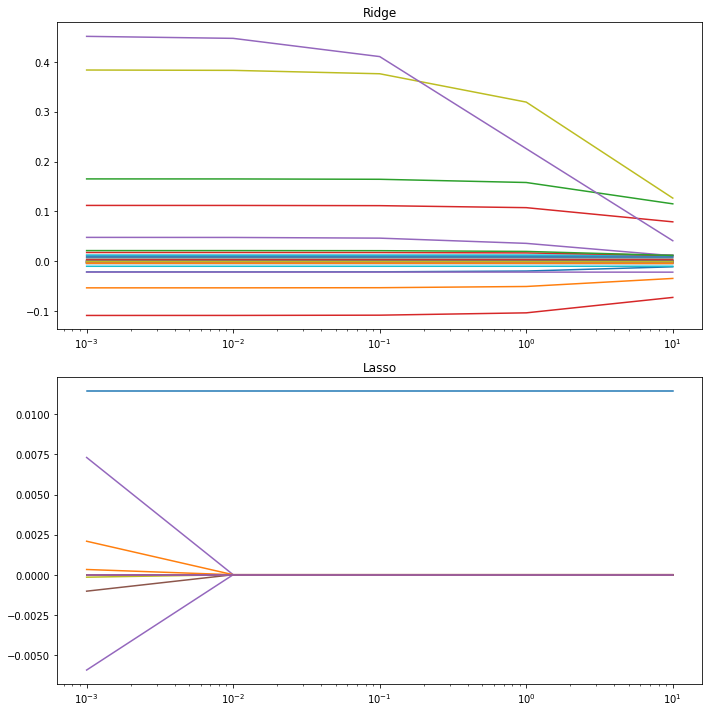

In [152]:
import matplotlib as mpl
plt.figure(figsize=(10,10))
mpl.rcParams["font.family"] = 'DejaVu Sans'
ax1 = plt.subplot(211)
plt.semilogx(df_ridge.T)
plt.xticks(alpha)
plt.title("Ridge")
ax2 = plt.subplot(212)
plt.semilogx(df_lasso.T)
plt.xticks(alpha)
plt.title("Lasso")
plt.tight_layout()
plt.show()

# Overall table about modeling

In [153]:
modelingdf = pd.DataFrame()
modelingdf['model'] = ['result1','result2','result3','result4','result5','result5_1','result5_2']
modelingdf['description'] = ['numerical','categorical','featurenum','featurecat','featuremerge','drop1','drop2']
modelingdf['adj_rsquared'] = [result1.rsquared_adj,result2.rsquared_adj,result3.rsquared_adj,result4.rsquared_adj,result5.rsquared_adj,result5_1.rsquared_adj,result5_2.rsquared_adj]
modelingdf['rsquared'] = [result1.rsquared,result2.rsquared,result3.rsquared,result4.rsquared,result5.rsquared,result5_1.rsquared,result5_2.rsquared]
modelingdf['AIC'] = [result1.aic,result2.aic,result3.aic,result4.aic,result5.aic,result5_1.aic,result5_2.aic]
modelingdf['BIC'] = [result1.bic,result2.bic,result3.bic,result4.bic,result5.bic,result5_1.bic,result5_2.bic]
modelingdf.sort_values(by='model',inplace=True)
modelingdf

,model,description,adj_rsquared,rsquared,AIC,BIC
0,result1,numerical,0.004970,0.005290,-73889.731981,-73607.413505
1,result2,categorical,0.009996,0.011586,-74230.929815,-72856.979902
2,result3,featurenum,0.004722,0.004877,-73882.234619,-73741.075381
3,result4,featurecat,0.006230,0.006450,-73559.479690,-73371.267373
4,result5,featuremerge,0.010564,0.010937,-73940.089728,-73620.128790
5,result5_1,drop1,0.009508,0.009860,-73845.831300,-73544.691593
6,result5_2,drop2,0.008881,0.009199,-73791.648373,-73518.740513


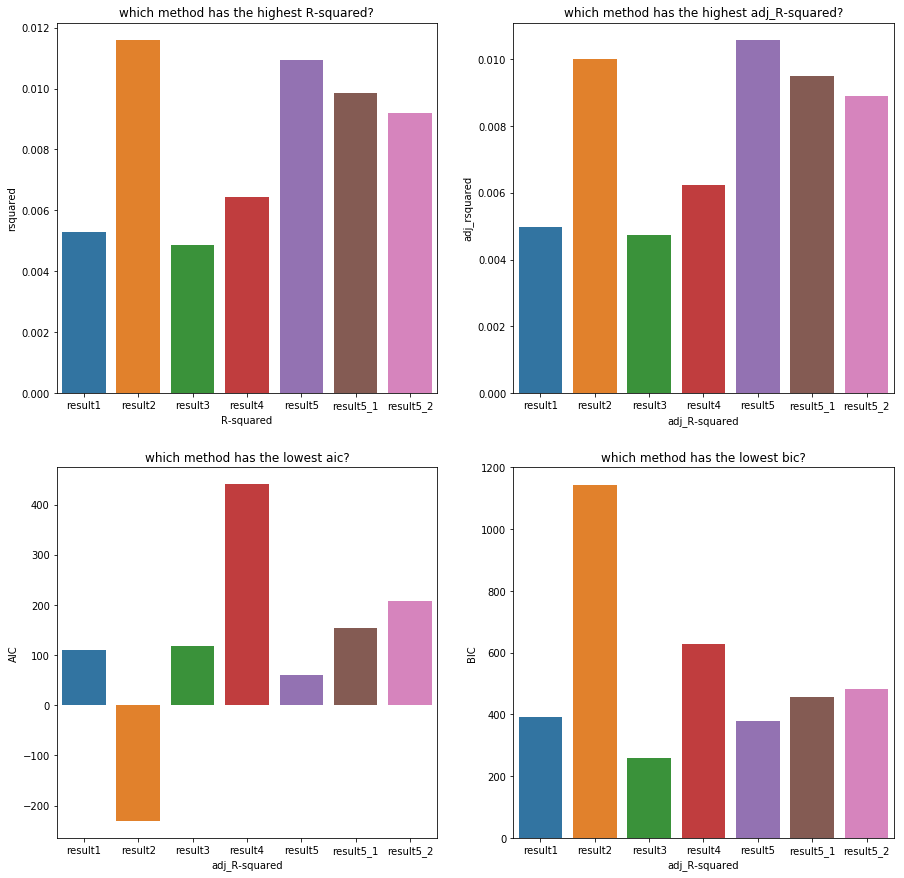

In [154]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.barplot(modelingdf.model,modelingdf.rsquared)
plt.title('which method has the highest R-squared?')
plt.xlabel('R-squared')
plt.subplot(2,2,2)
sns.barplot(modelingdf.model,modelingdf.adj_rsquared)
plt.title('which method has the highest adj_R-squared?')
plt.xlabel('adj_R-squared')
plt.subplot(2,2,3)
sns.barplot(modelingdf.model,modelingdf.AIC+74000)
plt.title('which method has the lowest aic?')
plt.xlabel('adj_R-squared')
plt.subplot(2,2,4)
sns.barplot(modelingdf.model,modelingdf.BIC+74000)
plt.title('which method has the lowest bic?')
plt.xlabel('adj_R-squared')
plt.show()

## Outlier & Leverage ( Cook's Distance)

Standardized Outlier

In [155]:
idx_r = np.where(result5_2.resid_pearson > 2)[0]

Cook's Distance

In [156]:
train_all = pd.concat([train_y,train_col_2],axis=1)

In [157]:
influence = result5.get_influence()
cooks_d2, pvals = influence.cooks_distance
fox_cr = 4 / (len(train_all) - len(train_col_2.columns) - 1)
idx_c = np.where(cooks_d2 > fox_cr)[0]

/home/hskimim/anaconda3/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:323: RuntimeWarning: invalid value encountered in sqrt
  return  self.results.resid / sigma / np.sqrt(1 - hii)
/home/hskimim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/hskimim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/hskimim/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
/home/hskimim/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in greater
  after removing the cwd from sys.path.


In [158]:
resid_outliers = idx_r.tolist()
cooks_outliers = idx_c.tolist()

In [159]:
resid_cooks = list(set(resid_outliers) | set(cooks_outliers))
print("Resid_Cooks_distance :", len(resid_cooks ),"개 \n", resid_cooks)

Resid_Cooks_distance : 3108 개 
 [57344, 5, 10, 57356, 73742, 90129, 81951, 8224, 57382, 8231, 32807, 57391, 32818, 57396, 90167, 8248, 32825, 65596, 32829, 65600, 73799, 81999, 65616, 32849, 57433, 82011, 32861, 57439, 65631, 16486, 73831, 16488, 32874, 106, 8306, 90226, 24692, 24693, 82034, 82036, 90232, 121, 90236, 16509, 32894, 124, 90240, 8324, 16516, 41101, 8336, 57488, 57489, 82073, 158, 90272, 32929, 90274, 49315, 82082, 49318, 8360, 24745, 8367, 82096, 49329, 41138, 41137, 65715, 73915, 82108, 16573, 16575, 49347, 65733, 32973, 82125, 41166, 49361, 73937, 24787, 212, 41174, 24793, 16616, 24809, 33001, 82160, 41206, 24823, 33016, 65785, 49410, 41226, 49423, 65810, 24851, 277, 16662, 82197, 41240, 281, 65818, 82198, 41241, 74011, 49442, 33059, 293, 49450, 16683, 82220, 303, 33074, 49459, 82227, 41270, 57655, 74040, 8506, 49468, 65852, 57660, 49481, 33099, 74063, 24912, 8530, 74067, 82261, 8535, 33114, 24926, 24927, 41311, 82273, 16744, 41321, 82284, 24941, 65909, 49526, 82295, 85

In [160]:
train_col_2.tail()

,basementsqft,bathroomcnt,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,garagetotalsqft,lotsizesquarefeet,poolsizesum,roomcnt,yardbuildingsqft17,...,C(fireplacecnt)[T.5.0],C(propertylandusetypeid)[T.246.0],C(rawcensustractandblock)[T.60372],C(rawcensustractandblock)[T.60374],C(rawcensustractandblock)[T.60376],C(rawcensustractandblock)[T.60377],C(rawcensustractandblock)[T.60378],C(rawcensustractandblock)[T.60379],C(taxdelinquencyyear)[T.8.0],C(taxdelinquencyyear)[T.99.0]
90270,-0.01867,-1.274040,-0.256064,-1.205116,-0.059074,0.0,0.584515,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90271,-0.01867,0.717466,-0.256064,1.173823,-0.059074,0.0,-0.149416,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90272,-0.01867,-0.278287,-0.256064,0.915736,-0.059074,0.0,-0.170982,-0.099779,-0.524369,-0.141747,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
90273,-0.01867,-0.278287,-0.256064,-0.793688,-0.059074,0.0,-0.056383,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
90274,-0.01867,-1.274040,-0.256064,-0.264555,-0.059074,0.0,-0.186133,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
# Remove outliers after selecting variables
train_col_2 = train_col_2.drop(resid_cooks)

train_y = train_y.drop(resid_cooks)

In [162]:
train_col_2.tail()
# which is df that delelted multicollinearity columns

,basementsqft,bathroomcnt,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet6,garagetotalsqft,lotsizesquarefeet,poolsizesum,roomcnt,yardbuildingsqft17,...,C(fireplacecnt)[T.5.0],C(propertylandusetypeid)[T.246.0],C(rawcensustractandblock)[T.60372],C(rawcensustractandblock)[T.60374],C(rawcensustractandblock)[T.60376],C(rawcensustractandblock)[T.60377],C(rawcensustractandblock)[T.60378],C(rawcensustractandblock)[T.60379],C(taxdelinquencyyear)[T.8.0],C(taxdelinquencyyear)[T.99.0]
90268,-0.01867,0.717466,-0.256064,0.722440,-0.059074,0.0,-0.187203,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90269,-0.01867,-0.278287,-0.256064,-0.346624,-0.059074,0.0,-0.164637,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
90270,-0.01867,-1.274040,-0.256064,-1.205116,-0.059074,0.0,0.584515,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90271,-0.01867,0.717466,-0.256064,1.173823,-0.059074,0.0,-0.149416,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90273,-0.01867,-0.278287,-0.256064,-0.793688,-0.059074,0.0,-0.056383,-0.099779,-0.524369,-0.141747,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [163]:
final_model = sm.OLS(train_y,train_col_2)
final_result = final_model.fit()
print(final_result.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     55.04
Date:                Thu, 12 Jul 2018   Prob (F-statistic):          3.71e-294
Time:                        23:27:38   Log-Likelihood:                 99984.
No. Observations:               87167   AIC:                        -1.999e+05
Df Residuals:                   87140   BIC:                        -1.997e+05
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

I should fix the multicollinearity problem by PCA , VIF , variable selecting.